In [183]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import sys
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)


In [184]:
import importlib
import src.statistic as my_stats  # замените на имя своего модуля
import src.visualise_utils as my_visualise 
import src.model as my_models

importlib.reload(my_stats)
importlib.reload(my_visualise)
importlib.reload(my_models)

<module 'src.model' from '/Users/igoreshka/Desktop/SGDiffusion/src/model.py'>

In [185]:
DEVICE = "mps"

CHECKPOINT_MODELS = f"{repo_root}/data/checkpoints/exp12"
CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp12"


In [186]:
dataset, full_loader, train_loader, data, data_tensor, labels  = my_visualise.init_data(
    loc1 = [-3, -1], 
    loc2 = [1, 3],
    sigma1=1, 
    sigma2 = 2,
    batch_size=1
    )

In [187]:
device = DEVICE
model = my_models.SimpleModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [188]:
loss_trajectory = my_stats.train(
    model = model,
    criterion = criterion,
    optimizer = optimizer,
    train_loader = train_loader,
    full_loader = full_loader,
    n_steps=100,
    device=device,
    base_folder=CHECKPOINT_DIR,
    gradient_sampling= True , 
    model_save= True  
)

  5%|▌         | 100/2000 [03:52<1:13:34,  2.32s/it]


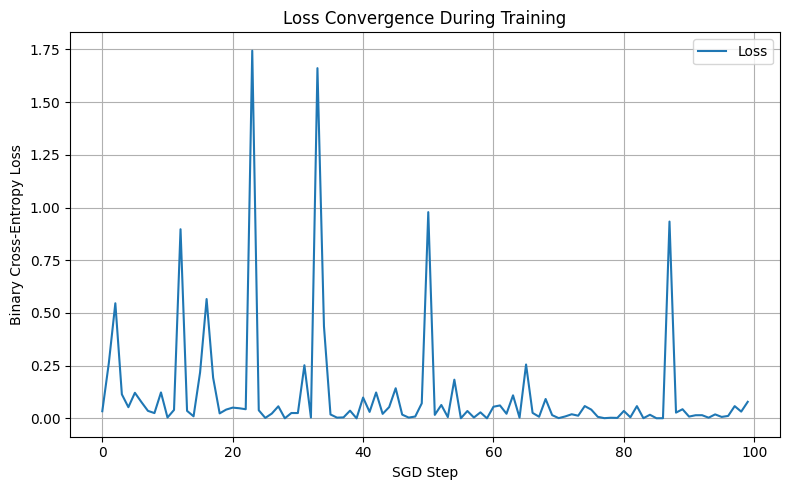

In [189]:
my_visualise.loss_visualise(loss_trajectory)

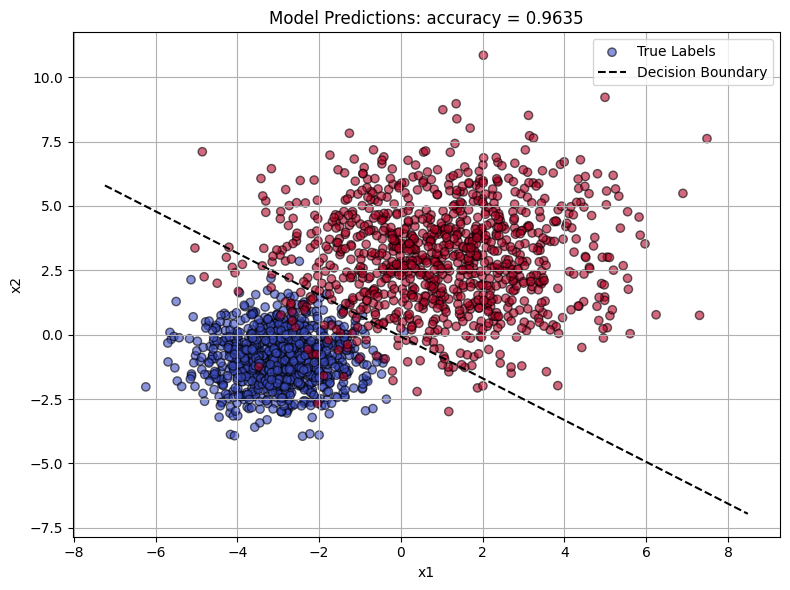

In [190]:
# my_visualise.prediction_visualise(data , data_tensor, model, device)
my_visualise.visualise_simple_model(data , data_tensor, labels,  model, device)

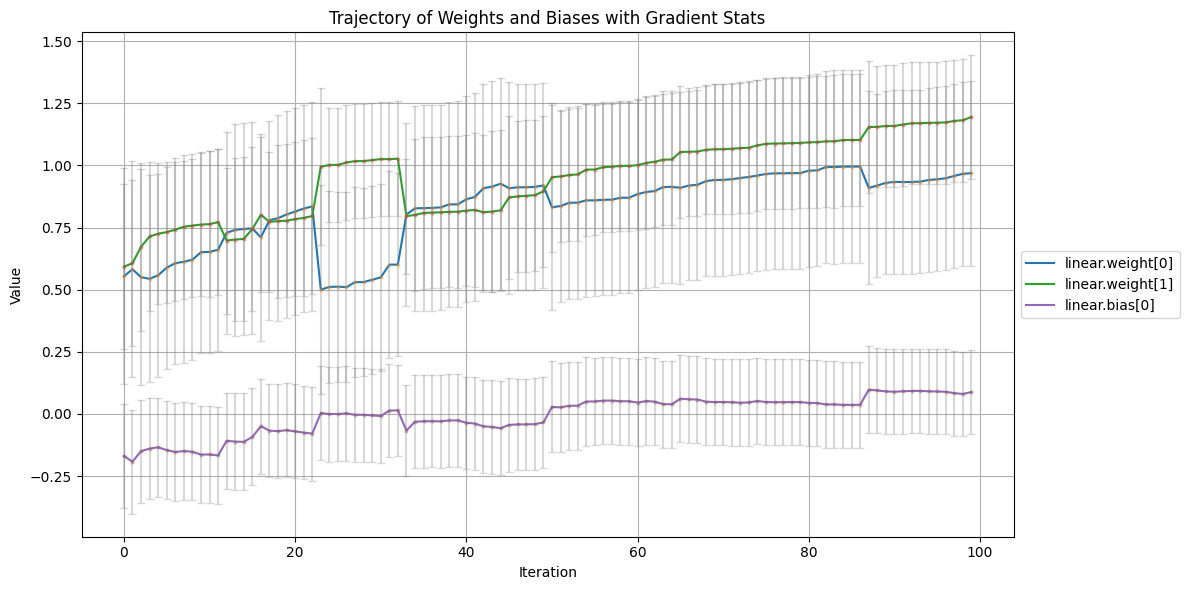

In [191]:
my_visualise.visualize_weight_and_bias_trajectory_with_gradient_stats(f"{CHECKPOINT_DIR}", num_steps=100)

## Batch size = 1 hists:

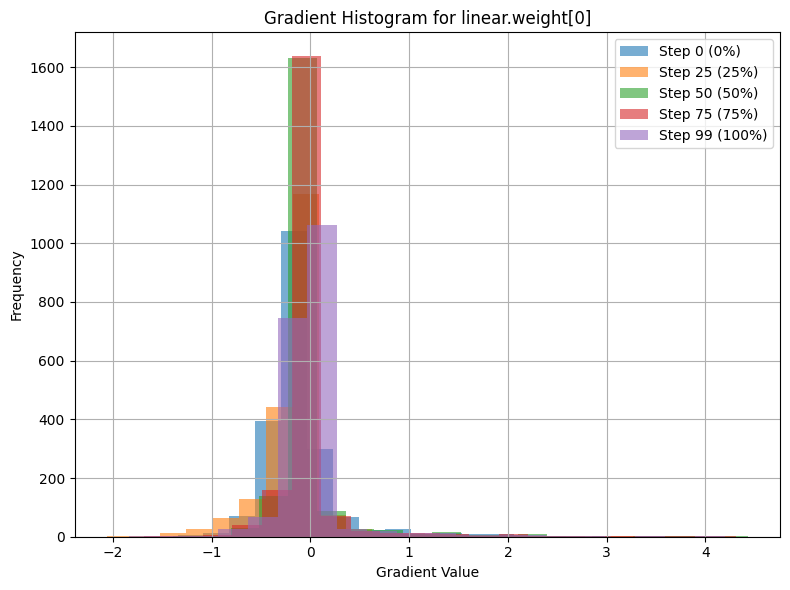

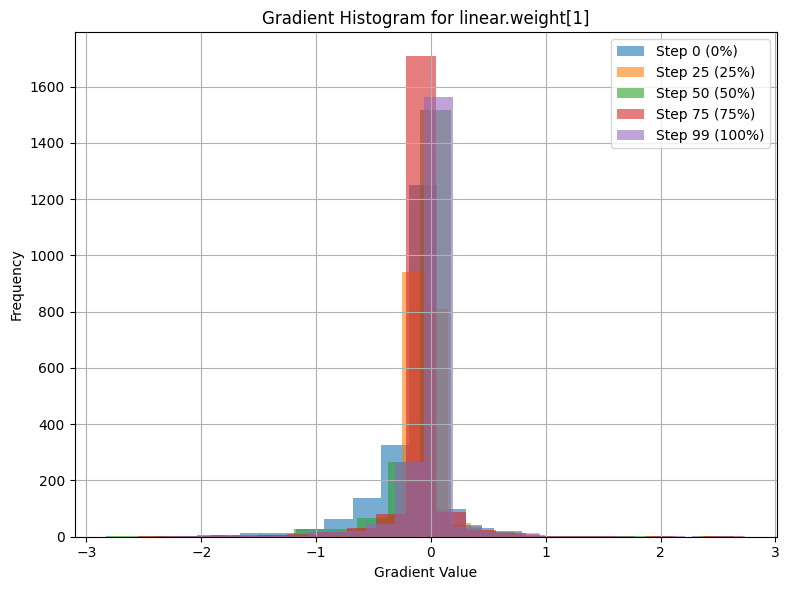

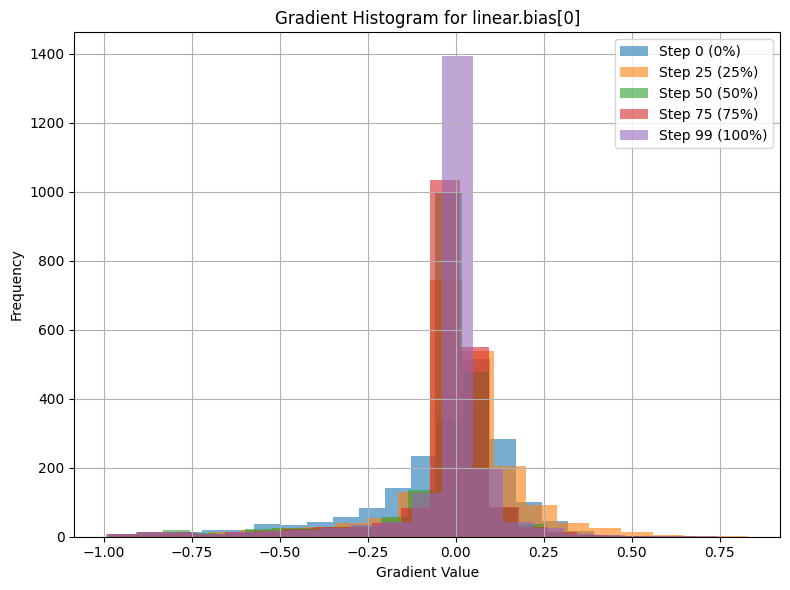

In [192]:
my_visualise.visualize_gradient_histograms_at_steps(f"{CHECKPOINT_DIR}", num_steps=100, batch_size=1)


## Batch size = 1, alpha stable estimation

In [195]:
def estimate_alpha_fn( values , type = 1):
    values = torch.tensor(values)
    values = values - values.mean(axis = 0)
    values = values.unsqueeze(-1)

    m = len(values) // 10
    if type == 1:
        alpha = my_visualise.alpha_estimator(m, values[:10*m])
    elif type == 2:    
        k = 5
        alpha = my_visualise.alpha_estimator2(m, k, values[:10*m])
    return alpha

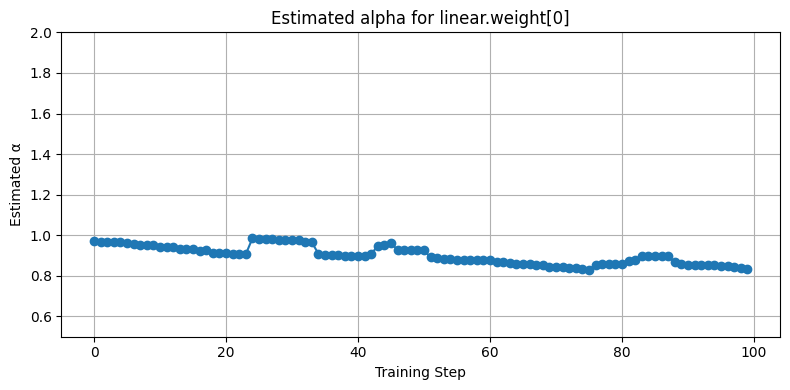

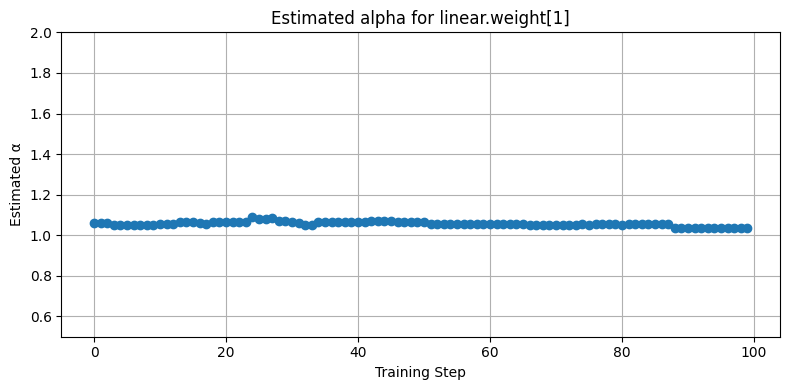

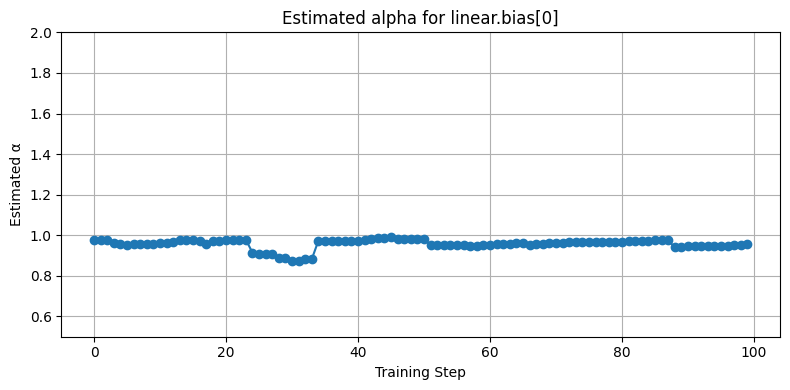

In [199]:
alpha_values, grad_values = my_visualise.visualize_alpha_over_steps(f"{CHECKPOINT_DIR}", num_steps=100, batch_size=1, estimate_alpha_fn = estimate_alpha_fn)

## Batch size = 16 hists:

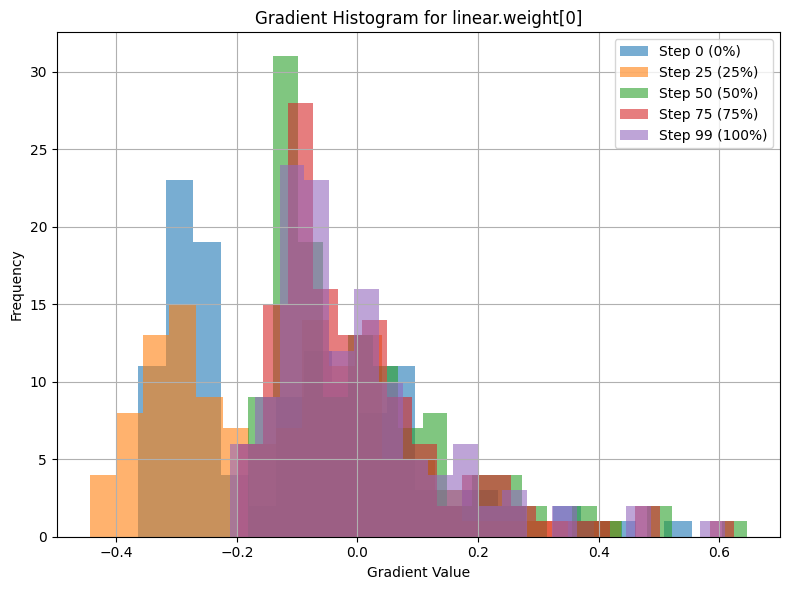

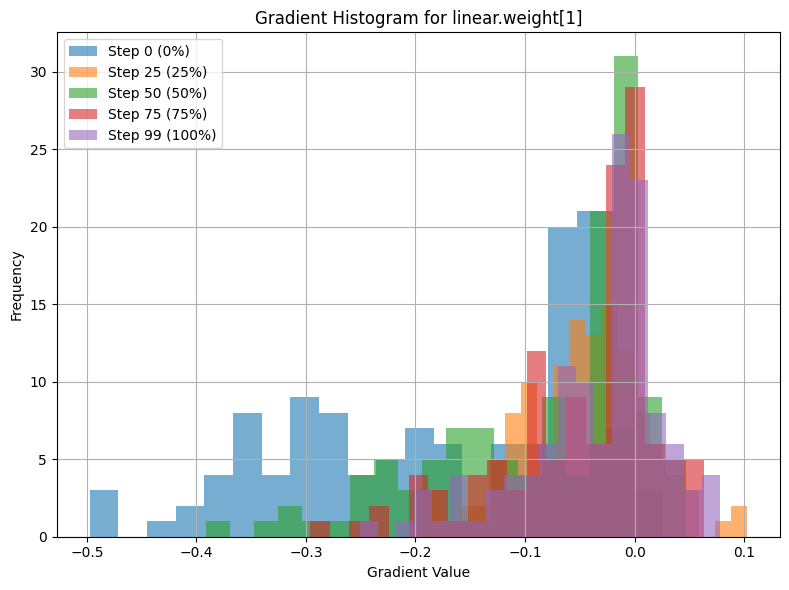

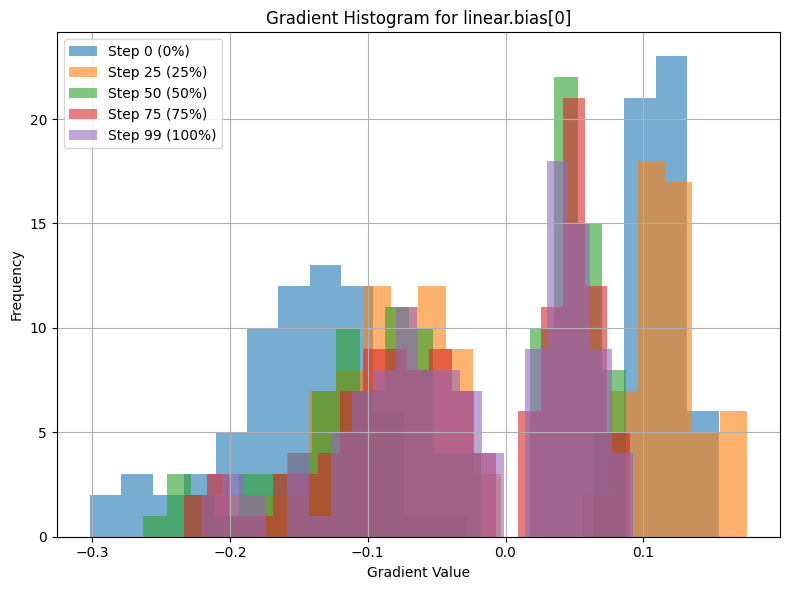

In [201]:
my_visualise.visualize_gradient_histograms_at_steps(f"{CHECKPOINT_DIR}", num_steps=100, batch_size=16)


## Batch size = 16, alpha stable estimation

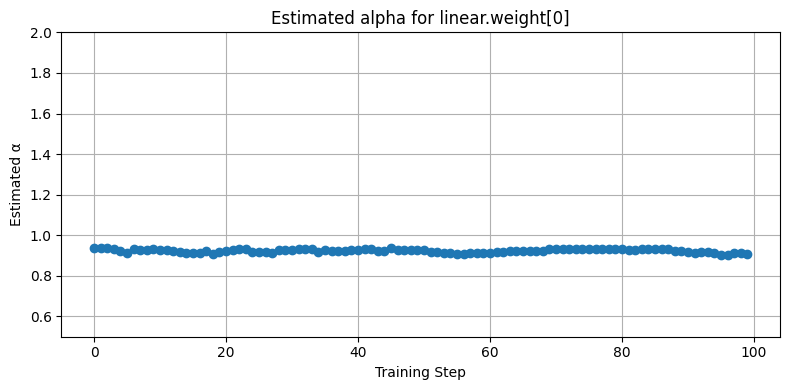

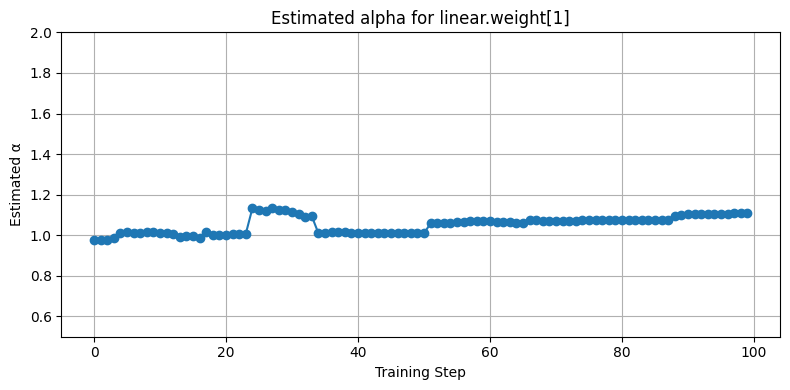

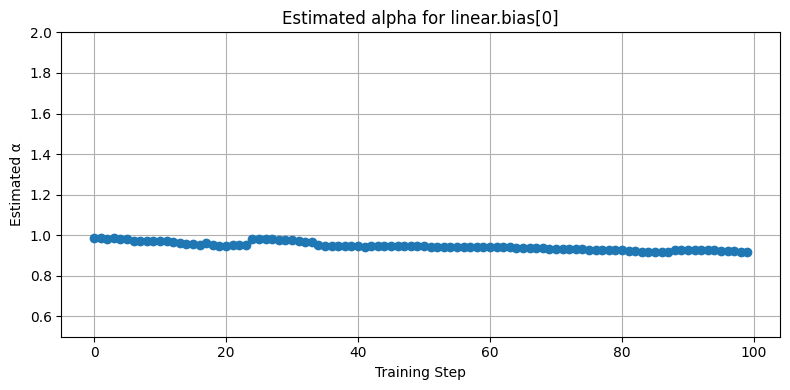

In [202]:
alpha_values, grad_values = my_visualise.visualize_alpha_over_steps(f"{CHECKPOINT_DIR}", num_steps=100, batch_size=16, estimate_alpha_fn = estimate_alpha_fn)